# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

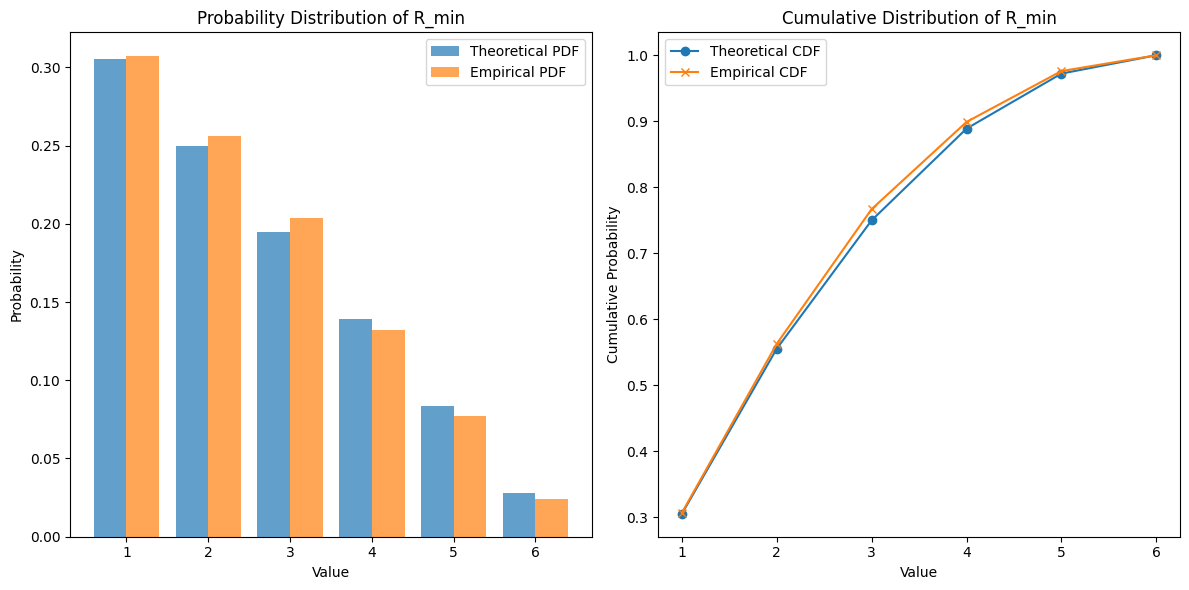

Theoretical Probabilities: [0.30555556 0.25       0.19444444 0.13888889 0.08333333 0.02777778]
Empirical Probabilities: [0.307 0.256 0.204 0.132 0.077 0.024]
Expected Value of R_min: 2.4880


In [22]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_theoretical_distribution():
    faces = np.arange(1, 7)
    pdf = np.zeros(6)

    for i in faces:
        for j in faces:
            min_value = min(i, j)
            pdf[min_value - 1] += 1

    pdf /= 36  
    cdf = np.cumsum(pdf)
    return pdf, cdf

def simulate_dice_rolls(num_rolls):
    d1 = np.random.randint(1, 7, num_rolls)
    d2 = np.random.randint(1, 7, num_rolls)
    r_min = np.minimum(d1, d2)
    
    empirical_pdf = np.array([(r_min == i).mean() for i in range(1, 7)])
    empirical_cdf = np.cumsum(empirical_pdf)
    
    return r_min, empirical_pdf, empirical_cdf

num_rolls = 1000
theoretical_pdf, theoretical_cdf = calculate_theoretical_distribution()
r_min, empirical_pdf, empirical_cdf = simulate_dice_rolls(num_rolls)

expected_value = np.mean(r_min)

faces = np.arange(1, 7)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(faces - 0.2, theoretical_pdf, width=0.4, label='Theoretical PDF', alpha=0.7)
plt.bar(faces + 0.2, empirical_pdf, width=0.4, label='Empirical PDF', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability Distribution of R_min')
plt.xticks(faces)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(faces, theoretical_cdf, marker='o', label='Theoretical CDF')
plt.plot(faces, empirical_cdf, marker='x', label='Empirical CDF')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of R_min')
plt.xticks(faces)
plt.legend()

plt.tight_layout()
plt.show()

print(f"Theoretical Probabilities: {theoretical_pdf}")
print(f"Empirical Probabilities: {empirical_pdf}")
print(f"Expected Value of R_min: {expected_value:.4f}")

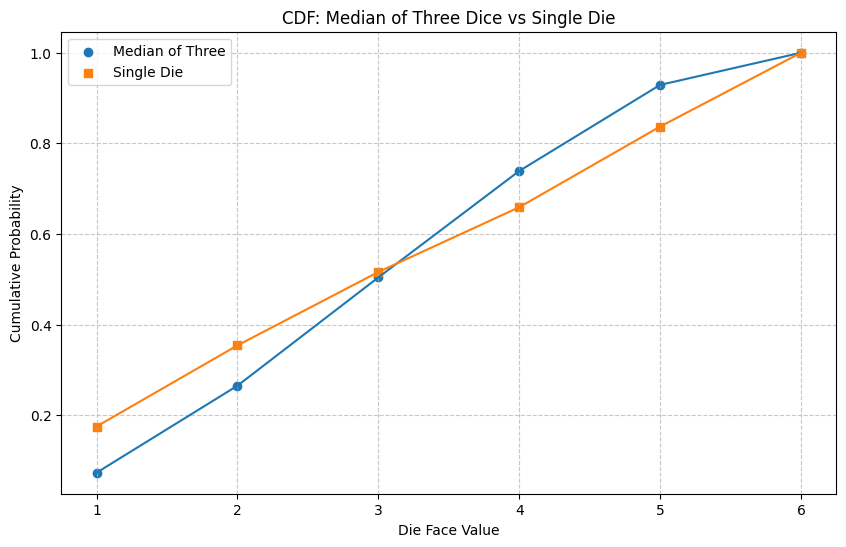

Expected value of median roll: 3.4900

Comparison with single die roll:
Value 1: less likely (Probability: 0.0730 vs 0.1667)
Value 2: more likely (Probability: 0.1920 vs 0.1667)
Value 3: more likely (Probability: 0.2390 vs 0.1667)
Value 4: more likely (Probability: 0.2350 vs 0.1667)
Value 5: more likely (Probability: 0.1900 vs 0.1667)
Value 6: less likely (Probability: 0.0710 vs 0.1667)


In [23]:
#question 2
import numpy as np
import matplotlib.pyplot as plt

def roll_three_dice(num_rolls):
    return np.random.randint(1, 7, (3, num_rolls))

def analyze_median_rolls(num_rolls):
    rolls = roll_three_dice(num_rolls)
    median_rolls = np.median(rolls, axis=0)
    return median_rolls

num_rolls = 1000
median_results = analyze_median_rolls(num_rolls)
single_die_results = np.random.randint(1, 7, num_rolls)

faces = np.arange(1, 7)
median_cdf = np.array([(median_results <= i).mean() for i in faces])
single_cdf = np.array([(single_die_results <= i).mean() for i in faces])

expected_value = np.mean(median_results)

plt.figure(figsize=(10, 6))

plt.scatter(faces, median_cdf, label='Median of Three', marker='o')
plt.plot(faces, median_cdf)
plt.scatter(faces, single_cdf, label='Single Die', marker='s')
plt.plot(faces, single_cdf)

plt.xlabel("Die Face Value")
plt.ylabel("Cumulative Probability")
plt.title('CDF: Median of Three Dice vs Single Die')
plt.legend()
plt.xticks(faces)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

print(f"Expected value of median roll: {expected_value:.4f}")

print("\nComparison with single die roll:")
for i in range(6):
    median_prob = median_cdf[i] - (0 if i == 0 else median_cdf[i-1])
    single_prob = 1/6
    diff = median_prob - single_prob
    comparison = "more" if diff > 0 else "less" if diff < 0 else "equally"
    print(f"Value {i+1}: {comparison} likely (Probability: {median_prob:.4f} vs {single_prob:.4f})")

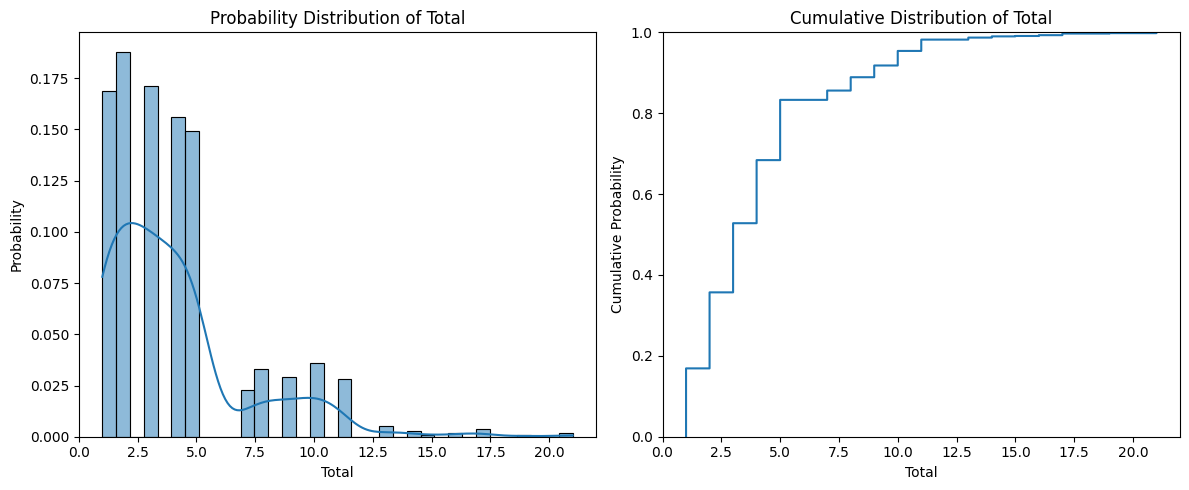

Expected value: 4.0640

Probabilities for totals 1 to 10:
Total 1: 0.1690
Total 2: 0.1880
Total 3: 0.1710
Total 4: 0.1560
Total 5: 0.1490
Total 6: 0.0000
Total 7: 0.0230
Total 8: 0.0330
Total 9: 0.0290
Total 10: 0.0360

Median: 3.0
Standard Deviation: 3.0512
Maximum observed total: 21


In [24]:
# question 3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def conditional_roll():
    total = 0
    while True:
        roll = np.random.randint(1, 7)
        total += roll
        if roll != 6:
            return total

def simulate_rolls(num_simulations):
    return np.array([conditional_roll() for _ in range(num_simulations)])


num_simulations = 1000
results = simulate_rolls(num_simulations)

expected_value = np.mean(results)

unique, counts = np.unique(results, return_counts=True)
probabilities = counts / num_simulations


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(results, kde=True, stat='probability')
plt.title('Probability Distribution of Total')
plt.xlabel('Total')
plt.ylabel('Probability')

plt.subplot(1, 2, 2)
sns.ecdfplot(results)
plt.title('Cumulative Distribution of Total')
plt.xlabel('Total')
plt.ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

print(f"Expected value: {expected_value:.4f}")
print("\nProbabilities for totals 1 to 10:")
for total in range(1, 11):
    prob = probabilities[unique == total][0] if total in unique else 0
    print(f"Total {total}: {prob:.4f}")

print(f"\nMedian: {np.median(results)}")
print(f"Standard Deviation: {np.std(results):.4f}")
print(f"Maximum observed total: {np.max(results)}")

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups. 
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results? 

Cross tabulation:
breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500
breast_cancer_death        no       yes       All
treatment                                        
control              0.494295  0.005621  0.499917
mammogram            0.494518  0.005566  0.500083
All                  0.988813  0.011187  1.000000 


Difference in 25-year survival rates: 0.000115


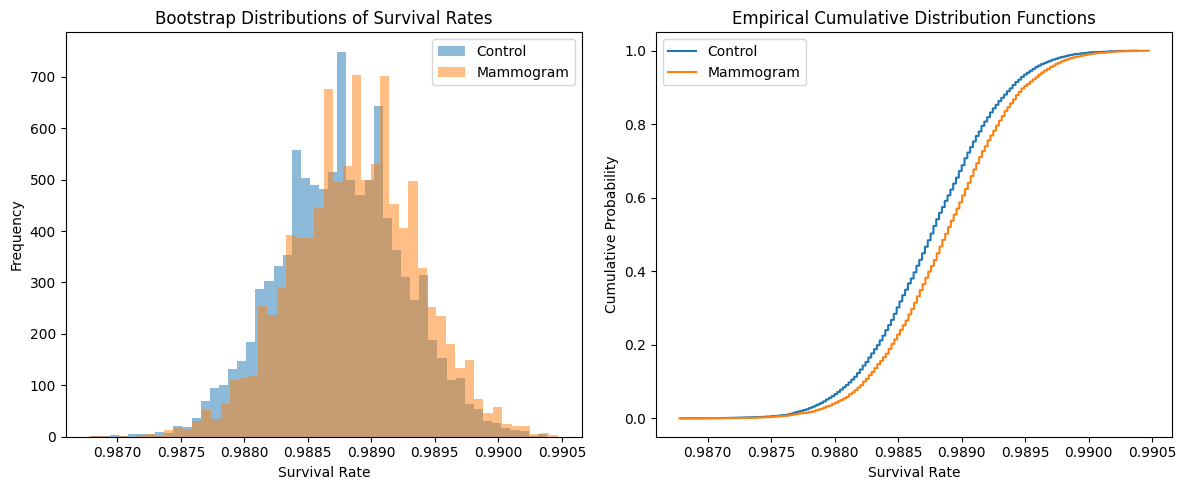


99% Confidence Interval: (-0.001688, 0.001852)
Includes zero: Yes


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('./data/mammogram.csv')

# 1. 
cross_tab = pd.crosstab(df['treatment'], df['breast_cancer_death'])
control_survival = cross_tab.loc['control', 'no'] / cross_tab.loc['control'].sum()
mammogram_survival = cross_tab.loc['mammogram', 'no'] / cross_tab.loc['mammogram'].sum()
survival_diff = mammogram_survival - control_survival

print("Cross tabulation:")
print(cross_tab)
print( pd.crosstab( df['treatment'], df['breast_cancer_death'], margins=True, normalize=True) , '\n')
print(f"\nDifference in 25-year survival rates: {survival_diff:.6f}")

# 2. 
def bootstrap_survival(group, n_bootstrap=10000):
    survivals = []
    for _ in range(n_bootstrap):
        sample = group.sample(n=len(group), replace=True)
        survival_rate = (sample['breast_cancer_death'] == 'no').mean()
        survivals.append(survival_rate)
    return np.array(survivals)

control_group = df[df['treatment'] == 'control']
mammogram_group = df[df['treatment'] == 'mammogram']

control_survivals = bootstrap_survival(control_group)
mammogram_survivals = bootstrap_survival(mammogram_group)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(control_survivals, bins=50, alpha=0.5, label='Control')
plt.hist(mammogram_survivals, bins=50, alpha=0.5, label='Mammogram')
plt.xlabel('Survival Rate')
plt.ylabel('Frequency')
plt.title('Bootstrap Distributions of Survival Rates')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.sort(control_survivals), np.linspace(0, 1, len(control_survivals)), label='Control')
plt.plot(np.sort(mammogram_survivals), np.linspace(0, 1, len(mammogram_survivals)), label='Mammogram')
plt.xlabel('Survival Rate')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Functions')
plt.legend()
plt.tight_layout()
plt.show()

# 3. 
diff_distribution = mammogram_survivals - control_survivals
ci_99 = np.percentile(diff_distribution, [0.5, 99.5])

print(f"\n99% Confidence Interval: ({ci_99[0]:.6f}, {ci_99[1]:.6f})")
print(f"Includes zero: {'Yes' if ci_99[0] < 0 < ci_99[1] else 'No'}")
